In [2]:
# First step is always import the necessary packages
import psycopg2
import psycopg2.extras
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np

In [3]:
# Connect to the database
connection = psycopg2.connect(host='localhost',
                             user='paygapuser',
                          port=5432,
                             database='paygap',
                             password='')
connection.set_session(readonly=True, autocommit=True)

#From our connection we need a cursor, which acts as our interface into the database
cur = connection.cursor(cursor_factory = psycopg2.extras.RealDictCursor)

# Exploratory Data Analysis

## Count of Data

In [7]:
cur.execute("SELECT count(*) as count FROM paygap.text;")
res = cur.fetchone()
print(f'There are {res["count"]} pieces of data in the text table')

There are 687120 pieces of data in the text table


In [8]:
cur.execute("SELECT count(*) as count FROM paygap.notext;")
res = cur.fetchone()
print(f'There are {res["count"]} pieces of data in the notext table')

There are 771220 pieces of data in the notext table


In [9]:
cur.execute("SELECT count(*) as count FROM paygap.users;")
res = cur.fetchone()
print(f'There are {res["count"]} pieces of data in the users table')

There are 856170 pieces of data in the users table


## Location Data

In [11]:
query = """
select count(distinct location) as nos FROM paygap.users;
"""

cur.execute(query)
location = cur.fetchone()

print(f'There are {location["nos"]} distinct user defined locations in our database')

There are 112487 distinct user defined locations in our database


In [12]:
query = """
select distinct location from paygap.users limit 20;
"""

cur.execute(query)
locations = cur.fetchall()

df_loc = pd.DataFrame.from_dict(locations)
df_loc

,location
0,ETH
1,"East London, United Kingdom"
2,hugging a tree 🇬🇧
3,all + kaeya enjoyer
4,London and Dubai
5,a Georgia piedmont cul-de-sac
6,Studio
7,"Macungie, PA"
8,The Minds Eye.
9,West of Ireland.


## Language Data

In [13]:
query = """
select count(distinct lang) as lan from paygap.notext;
"""

cur.execute(query)
language = cur.fetchone()

print(f'There are {language["lan"]} distinct languages in our database')

There are 60 distinct languages in our database


In [14]:
query = """
select lang, count(conversation_id) as no_tweets from paygap.notext 
group by lang order by no_tweets desc;
"""

cur.execute(query)
languages = cur.fetchall()

df_lang = pd.DataFrame.from_dict(languages)
df_lang

,lang,no_tweets
0,en,755159
1,hi,3723
2,tl,2053
3,qme,1601
4,zxx,1140
5,ko,1095
6,de,943
7,es,875
8,ja,624
9,und,597


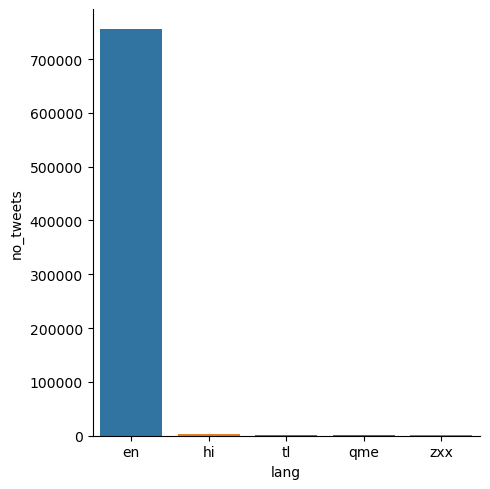

In [15]:
sns.catplot(data=df_lang.nlargest(5, 'no_tweets'), 
            x="lang", y="no_tweets", kind="bar")

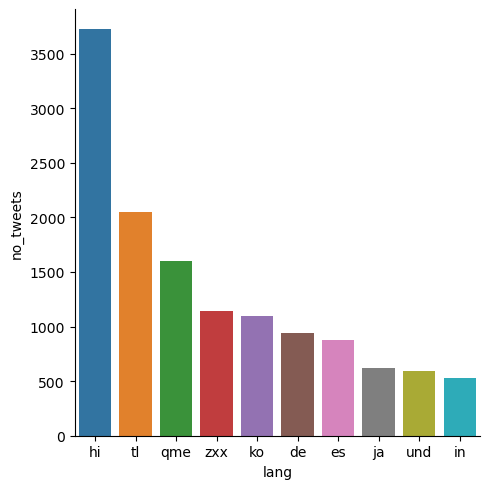

In [16]:
df_no_eng = df_lang.iloc[1:, :]
sns.catplot(data=df_no_eng.nlargest(10, 'no_tweets'), 
            x="lang", y="no_tweets", kind="bar")

The top 5 languages apart from english are:   
Hindi  
Tagalog  
Korean  
German  
Spanish  

The codes qme and zxx are not languages but are codes for tweets with only pictures and language not applicable.

## Analysis by topic

In [25]:
query = """
SELECT dominant_topic, count(dominant_topic) as num_tweets
FROM paygap.topics
GROUP BY dominant_topic;
"""

cur.execute(query)
topics = cur.fetchall()

df_topics = pd.DataFrame.from_dict(topics)
df_topics

,dominant_topic,num_tweets
0,Paid Sick Leave,38191
1,Pay Security and Policy,1901
2,Wage Gap in 2022,5473


In [30]:
query = """
SELECT dominant_topic, count(dominant_topic) as num_tweets, 
        avg(like_count) as avg_likes, 
        avg(retweet_count) as avg_retweets, 
        avg(quote_count) as avg_quotes
FROM paygap.topics
GROUP BY dominant_topic;
"""

cur.execute(query)
topics = cur.fetchall()

df_topic_metric = pd.DataFrame.from_dict(topics)
df_topic_metric

,dominant_topic,num_tweets,avg_likes,avg_retweets,avg_quotes
0,Paid Sick Leave,38191,129.183263,26.387421,7.069598
1,Pay Security and Policy,1901,99.142557,16.975276,3.238822
2,Wage Gap in 2022,5473,57.884159,10.730861,2.239905


Bar plots depicting the number of tweets, average likes, retweets and quotes by subtopics.

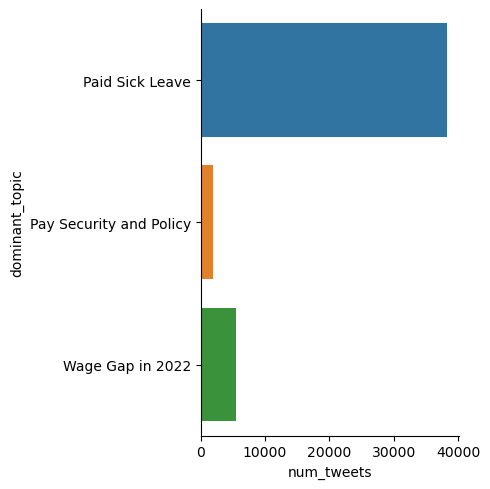

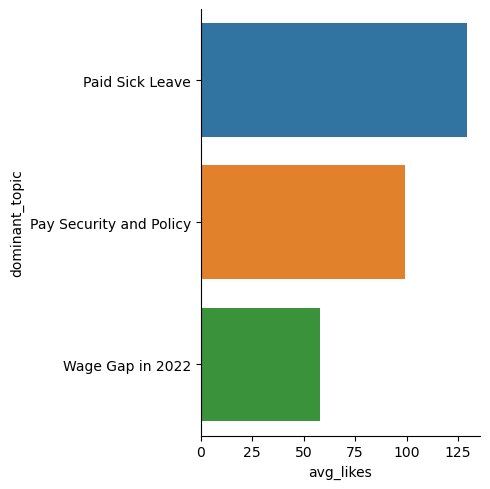

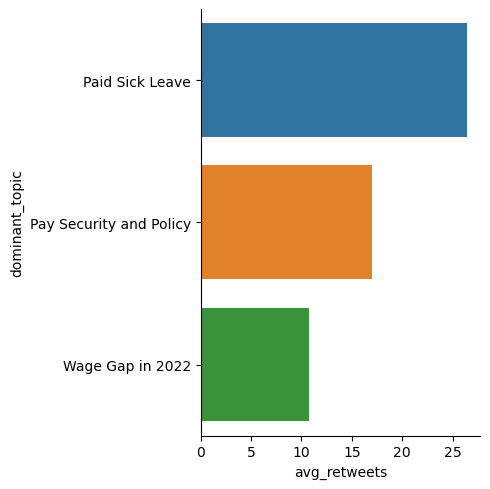

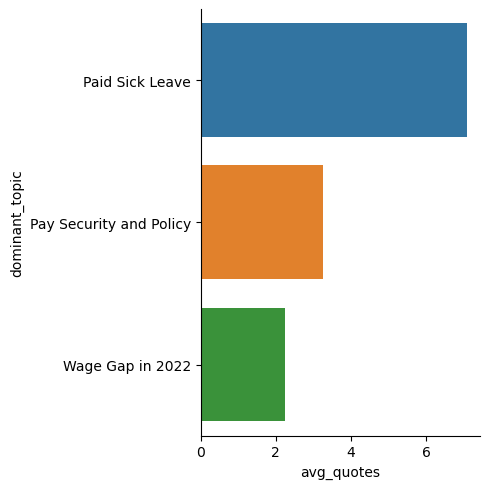

In [48]:
sns.catplot(data=df_topics, y="dominant_topic", x="num_tweets", kind="bar")
sns.catplot(data=df_topic_metric, y="dominant_topic", x="avg_likes", kind="bar")
sns.catplot(data=df_topic_metric, y="dominant_topic", x="avg_retweets", kind="bar")
sns.catplot(data=df_topic_metric, y="dominant_topic", x="avg_quotes", kind="bar")

## Users with the most frequent tweets in the topic

In [37]:
query = """
select distinct t.author_id, u.username, u.name, u.verified
from paygap.text t
join paygap.users u
on t.author_id = u.id;
"""
cur.execute(query)
username = cur.fetchall()

df_users = pd.DataFrame.from_dict(username)
df_users

,author_id,username,name,verified
0,12,jack,jack,true
1,224,davepell,Dave Pell,true
2,324,chrisfralic,Chris Fralic,true
3,409,Case,Eric Case,false
4,418,dens,Dennis Crowley 🇺🇸 (also: @dens@home.social),true
...,...,...,...,...
390205,1488165244190998532,DubaiPunk,DubaiPunk,false
390206,1488178362690457600,MusaAAdo2,Musa A Ado,false
390207,1488181447857164289,psk1895,prasad kulkarni,false
390208,1488190752559714304,LChuisa,Lisa Chuisa,false


In [32]:
query = """
select distinct t.author_id, count(t.author_id) as num_tweets
from paygap.text t 
where text not like 'RT %'
group by t.author_id
order by num_tweets desc
limit 20;
"""

cur.execute(query)
users = cur.fetchall()

df_user = pd.DataFrame.from_dict(users)
df_user

,author_id,num_tweets
0,2172596028,1476
1,29442313,1275
2,215465689,1205
3,148529707,1056
4,1321935792416149505,987
5,13121172,807
6,188793260,804
7,48624704,755
8,815733290955112448,669
9,1949836483,664


In [38]:
users_final = pd.merge(df_user, df_users, on="author_id")
users_final

,author_id,num_tweets,username,name,verified
0,2172596028,1476,DanPriceSeattle,Dan Price,true
1,29442313,1275,SenSanders,Bernie Sanders,true
2,215465689,1205,dnice_sinclair,Derrick Almighty 👑✊🏽,false
3,148529707,1056,RBReich,Robert Reich,true
4,1321935792416149505,987,MorePerfectUS,More Perfect Union,true
5,13121172,807,MiseryXchord,MiseryX ~This Machine Kills Fascists 📷 🇺🇦,false
6,188793260,804,ninaturner,Nina Turner,true
7,48624704,755,sallymcmanus,Sally McManus,true
8,815733290955112448,669,RepJayapal,Rep. Pramila Jayapal,true
9,1949836483,664,jbradleyrushing,Jessica Bradley Rushing,false


<AxesSubplot: xlabel='verified', ylabel='Count'>

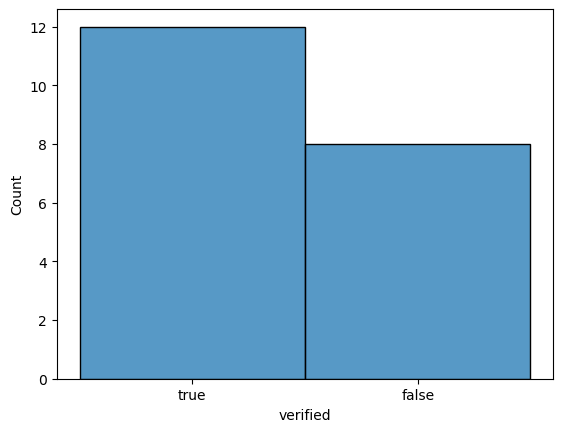

In [40]:
sns.histplot(data=users_final, x="verified")